# Example of using filter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from fdi_flow.preprocessing import filters

## Generate noised data

In [2]:
n_points = 500
time_list = np.linspace(0, 5, n_points)
data1 = 3 * np.sin(time_list) + np.random.normal(0, 0.5, n_points)
data2 = 2 * time_list + np.random.normal(0, 0.5, n_points)
np_data = np.vstack([data1, data2])
df_data = pd.DataFrame({
    'sensor1': data1,
    'sensor2': data2
    }, index=time_list)

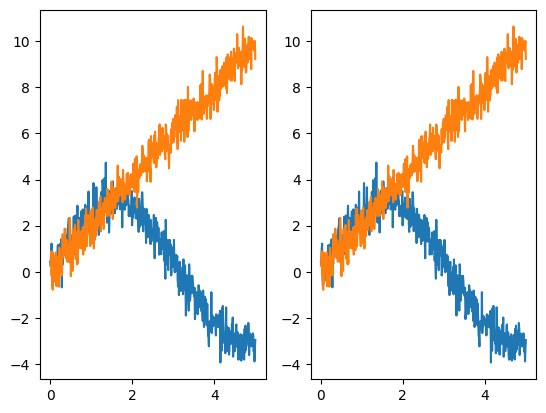

In [3]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_list, np_data[0, :])
axs[0].plot(time_list, np_data[1, :])
axs[1].plot(df_data.index, df_data['sensor1'])
axs[1].plot(df_data.index, df_data['sensor2'])

## Exponential smoothing

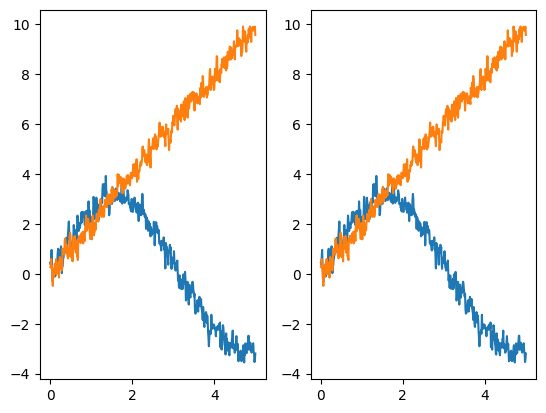

In [4]:
# Application to ndarray
exp_filter = filters.ExponentialSmoothing(alpha=0.5, axis=0)
filtered_np_data = exp_filter.apply(np_data)
# Application to pd.Dataframe# Application to pd.Dataframe
exp_filter = filters.ExponentialSmoothing(alpha=0.5, axis=1)
filtered_df_data = exp_filter.apply(df_data)

fig, axs = plt.subplots(1, 2)
axs[0].plot(time_list, filtered_np_data[0, :])
axs[0].plot(time_list, filtered_np_data[1, :])
axs[1].plot(df_data.index, filtered_df_data['sensor1'])
axs[1].plot(df_data.index, filtered_df_data['sensor2'])

## Double exponential smoothing

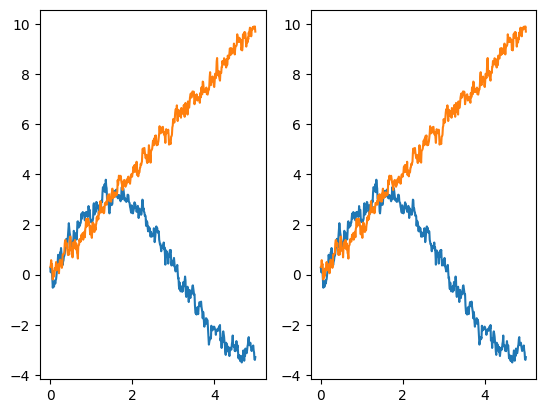

In [5]:
# Application to ndarray
dexp_filter = filters.DoubleExponentialSmoothing(alpha=0.3, beta=0.1,axis=0)
filtered_np_data = dexp_filter.apply(np_data)
# Application to pd.Dataframe# Application to pd.Dataframe
dexp_filter = filters.DoubleExponentialSmoothing(alpha=0.3, beta=0.1,axis=1)
filtered_df_data = dexp_filter.apply(df_data)

fig, axs = plt.subplots(1, 2)
axs[0].plot(time_list, filtered_np_data[0, :])
axs[0].plot(time_list, filtered_np_data[1, :])
axs[1].plot(df_data.index, filtered_df_data['sensor1'])
axs[1].plot(df_data.index, filtered_df_data['sensor2'])

## Moving average filter

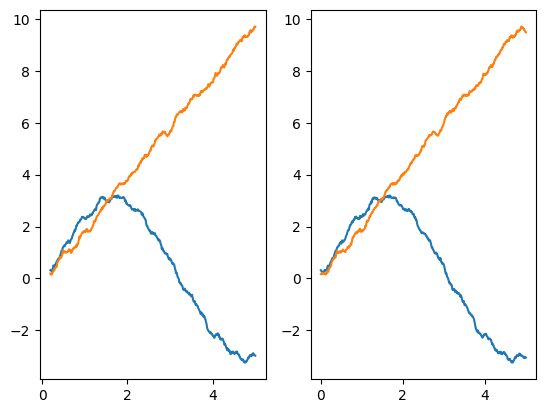

In [6]:
ma_filter_np = filters.MovingAverage(window_size=20, pad_with_zeros=False, axis=0)
filtered_np_data = ma_filter_np.apply(np_data)

ma_filter_df = filters.MovingAverage(window_size=21, pad_with_zeros=True, axis=1)
filtered_df_data = ma_filter_df.apply(df_data)

fig, axs = plt.subplots(1, 2)

axs[0].plot(time_list[-filtered_np_data.shape[1]:], filtered_np_data[0])
axs[0].plot(time_list[-filtered_np_data.shape[1]:], filtered_np_data[1])


axs[1].plot(filtered_df_data.index, filtered_df_data['sensor1'])
axs[1].plot(filtered_df_data.index, filtered_df_data['sensor2'])

## Median filter

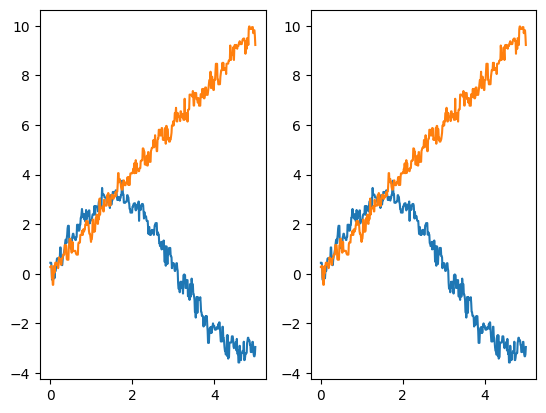

In [7]:
median_filter = filters.MedianFilter(window_size=5, axis=0)
filtered_np_data = median_filter.apply(np_data) 

median_filter = filters.MedianFilter(window_size=5, axis=1)
filtered_df_data = median_filter.apply(df_data)

fig, axs = plt.subplots(1, 2)

axs[0].plot(time_list[-filtered_np_data.shape[1]:], filtered_np_data[0])
axs[0].plot(time_list[-filtered_np_data.shape[1]:], filtered_np_data[1])


axs[1].plot(filtered_df_data.index, filtered_df_data['sensor1'])
axs[1].plot(filtered_df_data.index, filtered_df_data['sensor2'])

## Bandpass filter

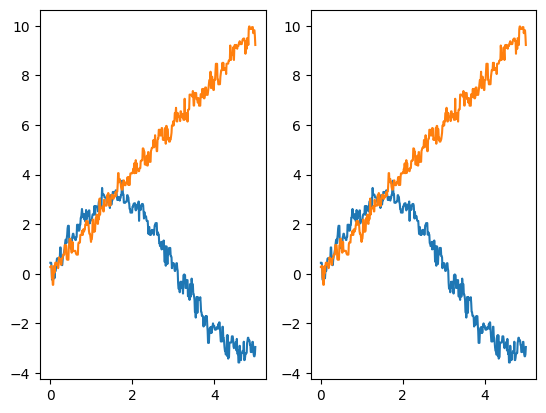

In [8]:
bandpass = filters.BandpassFilter(low_cutoff=0.1, high_cutoff=0.5, sample_rate=10, axis=0)
filtered_np = bandpass.apply(np_data)

bandpass = filters.BandpassFilter(low_cutoff=0.1, high_cutoff=0.5, sample_rate=10)
filtered_df = bandpass.apply(df_data)

fig, axs = plt.subplots(1, 2)

axs[0].plot(time_list[-filtered_np_data.shape[1]:], filtered_np_data[0])
axs[0].plot(time_list[-filtered_np_data.shape[1]:], filtered_np_data[1])


axs[1].plot(filtered_df_data.index, filtered_df_data['sensor1'])
axs[1].plot(filtered_df_data.index, filtered_df_data['sensor2'])

## Kalman filter

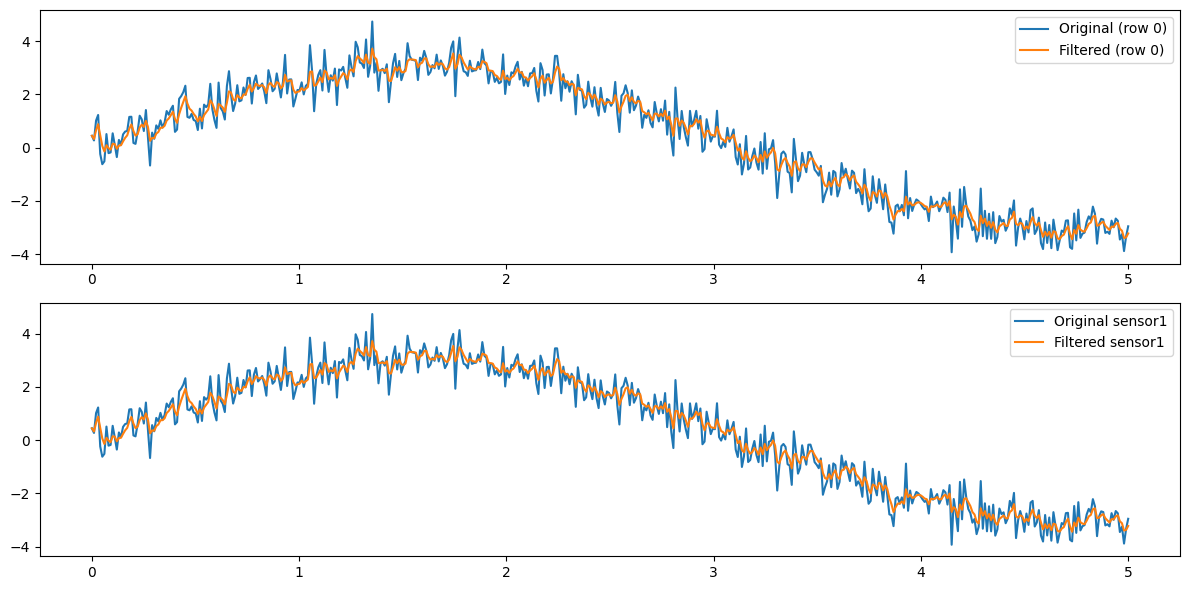

In [11]:
kf = filters.KalmanFilter(q=0.1, r=0.5, axis=0) 
filtered_np = kf.apply(np_data)

kf = filters.KalmanFilter(q=0.1, r=0.5, axis=1) 
filtered_df = kf.apply(df_data)


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_list, np_data[0], label='Original (row 0)')
plt.plot(time_list, filtered_np[0], label='Filtered (row 0)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_data.index, df_data['sensor1'], label='Original sensor1')
plt.plot(filtered_df.index, filtered_df['sensor1'], label='Filtered sensor1')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
s